# Performance Optimization for submit

In [1]:
%cd ..

/home/haito/kaggle/rsna-str/workdir


In [4]:
import numpy as np

size = 448
np.repeat(np.linspace(-1, 1, num=size).reshape(1,1,size), (1,size,1))

ValueError: operands could not be broadcast together with shape (448,) (2,)

In [2]:
from src.factory import *
from src.utils import *
import pandas as pd
import numpy as np
import pydicom
import matplotlib.pyplot as plt

SyntaxError: invalid syntax (datasets.py, line 99)

In [4]:
test = pd.read_csv("../input/rsna-str-pulmonary-embolism-detection/test.csv")

In [28]:
def load_dicom_array(dicom_files):
    """z pos sorted dicom images and files"""
    # dicom_files = glob.glob(os.path.join(series_dir, '*.dcm'))  # series_dir to dicom_files
    dicoms = [pydicom.dcmread(d) for d in dicom_files]
    M = float(dicoms[0].RescaleSlope)
    B = float(dicoms[0].RescaleIntercept)
    # Assume all images are axial
    z_pos = [float(d.ImagePositionPatient[-1]) for d in dicoms]

    # ### read with error check
    # dicoms_arr = []
    # for d in dicoms:
    #     try:
    #         img = d.pixel_array
    #     except:
    #         print('image error ', d)
    #         img = np.zeros(shape=(512,512))
    #     dicoms_arr.append(img)
    # dicoms = np.array(dicoms_arr)

    # dicoms = dicoms[np.argsort(z_pos)]
    # dicoms = dicoms * M
    # dicoms = dicoms + B
    dicoms = None

    sorted_sop = np.asarray([os.path.basename(f)[:-4] for f in dicom_files])[np.argsort(z_pos)]
    return dicoms, sorted_sop

def get_sorted_hu(df, folder='test'):
    d = '../input/rsna-str-pulmonary-embolism-detection/' + folder + '/' + df.StudyInstanceUID + '/' + df.SeriesInstanceUID + '/'
    dicom_files = list((d + df.SOPInstanceUID + '.dcm').unique())
    hu_images, sop_arr = load_dicom_array(dicom_files)
    return hu_images, sop_arr

In [52]:
def load_dicom_array2(dicom_files):
    """z pos sorted dicom images and files"""
    # dicom_files = glob.glob(os.path.join(series_dir, '*.dcm'))  # series_dir to dicom_files

    # dicoms = [pydicom.dcmread(d, stop_before_pixels=True, specific_tags=["ImagePositionPatient"]) for d in dicom_files]  # 111ms
    dicoms = [pydicom.dcmread(d, stop_before_pixels=True) for d in dicom_files]  # 123ms

    # M = float(dicoms[0].RescaleSlope)
    # B = float(dicoms[0].RescaleIntercept)
    # Assume all images are axial
    z_pos = [float(d.ImagePositionPatient[-1]) for d in dicoms]

    dicoms = None

    sorted_sop = np.asarray([os.path.basename(f)[:-4] for f in dicom_files])[np.argsort(z_pos)]
    # sorted_sop = None
    return dicoms, sorted_sop

def get_sorted_hu2(df, folder='test'):
    d = '../input/rsna-str-pulmonary-embolism-detection/' + folder + '/' + df.StudyInstanceUID + '/' + df.SeriesInstanceUID + '/'
    dicom_files = list((d + df.SOPInstanceUID + '.dcm').unique())
    hu_images, sop_arr = load_dicom_array2(dicom_files)
    return hu_images, sop_arr

In [37]:
test = test.set_index("StudyInstanceUID")

KeyError: "None of ['StudyInstanceUID'] are in the columns"

In [29]:
test

,SeriesInstanceUID,SOPInstanceUID
StudyInstanceUID,,
df06fad17bc3,857e3d760445,c3163725fcf6
df06fad17bc3,857e3d760445,d54a8daaf836
df06fad17bc3,857e3d760445,bdc531b699cd
df06fad17bc3,857e3d760445,9e6a68e27df0
df06fad17bc3,857e3d760445,25e3307ba7da
...,...,...
84a57a6bc1b4,cf16044f2cda,5f34e0c61c00
84a57a6bc1b4,cf16044f2cda,ccaa309b60da
84a57a6bc1b4,cf16044f2cda,a274c8d0916e


In [31]:
%timeit get_sorted_hu( test.loc["84a57a6bc1b4"].reset_index() )

189 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
%timeit test.loc["84a57a6bc1b4"].reset_index()

2.69 ms ± 53.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [53]:
%timeit get_sorted_hu2( test.loc["84a57a6bc1b4"].reset_index() )

123 ms ± 481 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [68]:
def load_dicom_array2(dicom_files):
    """z pos sorted dicom images and files"""
    # dicom_files = glob.glob(os.path.join(series_dir, '*.dcm'))  # series_dir to dicom_files

    # dicoms = [pydicom.dcmread(d, stop_before_pixels=True, specific_tags=["ImagePositionPatient"]) for d in dicom_files]  # 111ms
    dicoms = [pydicom.dcmread(d, stop_before_pixels=True) for d in dicom_files]  # 123ms

    # help(dicoms[0])
    # print(dicoms[0].keys())

    # M = float(dicoms[0].RescaleSlope)
    # B = float(dicoms[0].RescaleIntercept)
    # Assume all images are axial
    z_pos = [float(d.ImagePositionPatient[-1]) for d in dicoms]


    sorted_sop = np.asarray([os.path.basename(f)[:-4] for f in dicom_files])[np.argsort(z_pos)]
    # sorted_sop = None
    return dicoms, sorted_sop, dicoms[0]

def get_sorted_hu2(df, folder='test'):
    d = '../input/rsna-str-pulmonary-embolism-detection/' + folder + '/' + df.StudyInstanceUID + '/' + df.SeriesInstanceUID + '/'
    dicom_files = list((d + df.SOPInstanceUID + '.dcm').unique())
    hu_images, sop_arr, debug = load_dicom_array2(dicom_files)
    return hu_images, sop_arr, debug

In [69]:
_,_, di = get_sorted_hu2( test.loc["84a57a6bc1b4"].reset_index() )

In [94]:
for e in di.dir():
    print(e, getattr(di, e))

BitsAllocated 16
BitsStored 16
Columns 512
ConvolutionKernel FC08-H
Exposure 85
FrameOfReferenceUID 17f60f873ca8
GantryDetectorTilt +0.0
HighBit 15
ImageOrientationPatient [1.00000, 0.00000, 0.00000, 0.00000, 1.00000, 0.00000]
ImagePositionPatient [-167.6544, -135.6231, 1887.40]
ImageType ['ORIGINAL', 'PRIMARY', 'AXIAL']
InstanceNumber 143
KVP 100
Modality CT
PatientPosition FFS
PhotometricInterpretation MONOCHROME2
PixelRepresentation 1
PixelSpacing [0.628, 0.628]
RescaleIntercept 0
RescaleSlope 1
RotationDirection CW
Rows 512
SOPClassUID 80e30f500244
SOPInstanceUID 34c504507e8f
SamplesPerPixel 1
SeriesInstanceUID cf16044f2cda
SeriesNumber 2
SliceThickness 1.0
SpecificCharacterSet ISO_IR 100
StudyInstanceUID 84a57a6bc1b4
TableHeight +143.00
WindowCenter 50
WindowWidth 450
XRayTubeCurrent 243


In [105]:
for e in di.iterall():
    print(e)
    # print(f"       [get by function] ===> [{e.name}] [{e.keyword}] [{e.value}]")
    # print(f"       [get by function] ===> [{e.name}] [{e.keyword}] [{e.value}]")

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: "['ORIGINAL', 'PRIMARY', 'AXIAL']"
(0008, 0016) SOP Class UID                       UI: 80e30f500244
(0008, 0018) SOP Instance UID                    UI: 34c504507e8f
(0008, 0060) Modality                            CS: 'CT'
(0018, 0050) Slice Thickness                     DS: "1.0"
(0018, 0060) KVP                                 DS: "100.0"
(0018, 1120) Gantry/Detector Tilt                DS: "0.0"
(0018, 1130) Table Height                        DS: "143.0"
(0018, 1140) Rotation Direction                  CS: 'CW'
(0018, 1151) X-Ray Tube Current                  IS: "243"
(0018, 1152) Exposure                            IS: "85"
(0018, 1210) Convolution Kernel                  SH: 'FC08-H'
(0018, 5100) Patient Position                    CS: 'FFS'
(0020, 000d) Study Instance UID                  UI: 84a57a6bc1b4
(0020, 000e) Series Instance UID                 UI: c

In [128]:
dict( [(e.keyword, e.value) for e in di.iterall()] )

{'SpecificCharacterSet': 'ISO_IR 100',
 'ImageType': "['ORIGINAL', 'PRIMARY', 'AXIAL']",
 'SOPClassUID': '80e30f500244',
 'SOPInstanceUID': '34c504507e8f',
 'Modality': 'CT',
 'SliceThickness': "1.0",
 'KVP': "100.0",
 'GantryDetectorTilt': "0.0",
 'TableHeight': "143.0",
 'RotationDirection': 'CW',
 'XRayTubeCurrent': "243",
 'Exposure': "85",
 'ConvolutionKernel': 'FC08-H',
 'PatientPosition': 'FFS',
 'StudyInstanceUID': '84a57a6bc1b4',
 'SeriesInstanceUID': 'cf16044f2cda',
 'SeriesNumber': "2",
 'InstanceNumber': "143",
 'ImagePositionPatient': [-167.6544, -135.6231, 1887.40],
 'ImageOrientationPatient': [1.00000, 0.00000, 0.00000, 0.00000, 1.00000, 0.00000],
 'FrameOfReferenceUID': '17f60f873ca8',
 'SamplesPerPixel': 1,
 'PhotometricInterpretation': 'MONOCHROME2',
 'Rows': 512,
 'Columns': 512,
 'PixelSpacing': [0.628, 0.628],
 'BitsAllocated': 16,
 'BitsStored': 16,
 'HighBit': 15,
 'PixelRepresentation': 1,
 'WindowCenter': "50.0",
 'WindowWidth': "450.0",
 'RescaleIntercept': "0

In [77]:
ret = next( di.elements() )
ret

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'

In [87]:
ret.dir

AttributeError: 'DataElement' object has no attribute 'dir'

In [76]:
type(ret)

pydicom.dataelem.DataElement

In [84]:
ret.keyword

'SpecificCharacterSet'

In [85]:
ret.name

'Specific Character Set'

In [86]:
ret.value

'ISO_IR 100'

In [141]:

DIR = '../input/rsna-str-pulmonary-embolism-detection/test/'
def save_all_metainfo(df):
    pdata = []
    for c in tqdm( df.itertuples() ):
        path = DIR + c.StudyInstanceUID + '/' + c.SeriesInstanceUID + '/' + c.SOPInstanceUID + '.dcm'
        dicom = pydicom.dcmread(path, stop_before_pixels=True)
        pdata.append( dict( [(e.keyword, e.value) for e in dicom.iterall()] ) )
    return pd.DataFrame(pdata)

# ret = save_all_metainfo(test.reset_index())

In [142]:
%time save_all_metainfo(test.reset_index())

146853it [01:37, 1505.33it/s]
CPU times: user 1min 36s, sys: 2.5 s, total: 1min 39s
Wall time: 1min 39s


,SpecificCharacterSet,ImageType,SOPClassUID,SOPInstanceUID,Modality,SliceThickness,KVP,GantryDetectorTilt,TableHeight,RotationDirection,...,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,WindowCenter,WindowWidth,RescaleIntercept,RescaleSlope,
0,ISO_IR 100,"[ORIGINAL, PRIMARY, AXIAL, CT_SOM5 SPI]",80e30f500244,c3163725fcf6,CT,2.0,100.0,0.0,163.0,CW,...,"[0.677734375, 0.677734375]",16,12,11,0,"[50, -600]","[350, 1200]",-1024.0,1.0,NaN
1,ISO_IR 100,"[ORIGINAL, PRIMARY, AXIAL, CT_SOM5 SPI]",80e30f500244,d54a8daaf836,CT,2.0,100.0,0.0,163.0,CW,...,"[0.677734375, 0.677734375]",16,12,11,0,"[50, -600]","[350, 1200]",-1024.0,1.0,NaN
2,ISO_IR 100,"[ORIGINAL, PRIMARY, AXIAL, CT_SOM5 SPI]",80e30f500244,bdc531b699cd,CT,2.0,100.0,0.0,163.0,CW,...,"[0.677734375, 0.677734375]",16,12,11,0,"[50, -600]","[350, 1200]",-1024.0,1.0,NaN
3,ISO_IR 100,"[ORIGINAL, PRIMARY, AXIAL, CT_SOM5 SPI]",80e30f500244,9e6a68e27df0,CT,2.0,100.0,0.0,163.0,CW,...,"[0.677734375, 0.677734375]",16,12,11,0,"[50, -600]","[350, 1200]",-1024.0,1.0,NaN
4,ISO_IR 100,"[ORIGINAL, PRIMARY, AXIAL, CT_SOM5 SPI]",80e30f500244,25e3307ba7da,CT,2.0,100.0,0.0,163.0,CW,...,"[0.677734375, 0.677734375]",16,12,11,0,"[50, -600]","[350, 1200]",-1024.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146848,ISO_IR 100,"['ORIGINAL', 'PRIMARY', 'AXIAL']",80e30f500244,5f34e0c61c00,CT,1.0,100.0,0.0,143.0,CW,...,"[0.628, 0.628]",16,16,15,1,50,450,0.0,1.0,NaN
146849,ISO_IR 100,"['ORIGINAL', 'PRIMARY', 'AXIAL']",80e30f500244,ccaa309b60da,CT,1.0,100.0,0.0,143.0,CW,...,"[0.628, 0.628]",16,16,15,1,50,450,0.0,1.0,NaN
146850,ISO_IR 100,"['ORIGINAL', 'PRIMARY', 'AXIAL']",80e30f500244,a274c8d0916e,CT,1.0,100.0,0.0,143.0,CW,...,"[0.628, 0.628]",16,16,15,1,50,450,0.0,1.0,NaN
146851,ISO_IR 100,"['ORIGINAL', 'PRIMARY', 'AXIAL']",80e30f500244,a702de2c99c6,CT,1.0,100.0,0.0,143.0,CW,...,"[0.628, 0.628]",16,16,15,1,50,450,0.0,1.0,NaN


In [137]:
from tqdm.auto import tqdm

DIR = '../input/rsna-str-pulmonary-embolism-detection/test/'
def save_all_metainfo_2(df):
    pdata = []
    for c in tqdm( df.itertuples() ):
        path = DIR + c.StudyInstanceUID + '/' + c.SeriesInstanceUID + '/' + c.SOPInstanceUID + '.dcm'
        dicom = pydicom.read_file(path, stop_before_pixels=True)
        pdata.append( dict( [(e.keyword, e.value) for e in dicom.iterall()] ) )
    return pd.DataFrame(pdata)

# ret = save_all_metainfo(test.reset_index())

In [138]:
%time save_all_metainfo_2(test.reset_index())

146853it [01:35, 1530.13it/s]
CPU times: user 1min 34s, sys: 2.39 s, total: 1min 37s
Wall time: 1min 37s


,SpecificCharacterSet,ImageType,SOPClassUID,SOPInstanceUID,Modality,SliceThickness,KVP,GantryDetectorTilt,TableHeight,RotationDirection,...,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,WindowCenter,WindowWidth,RescaleIntercept,RescaleSlope,
0,ISO_IR 100,"[ORIGINAL, PRIMARY, AXIAL, CT_SOM5 SPI]",80e30f500244,c3163725fcf6,CT,2.0,100.0,0.0,163.0,CW,...,"[0.677734375, 0.677734375]",16,12,11,0,"[50, -600]","[350, 1200]",-1024.0,1.0,NaN
1,ISO_IR 100,"[ORIGINAL, PRIMARY, AXIAL, CT_SOM5 SPI]",80e30f500244,d54a8daaf836,CT,2.0,100.0,0.0,163.0,CW,...,"[0.677734375, 0.677734375]",16,12,11,0,"[50, -600]","[350, 1200]",-1024.0,1.0,NaN
2,ISO_IR 100,"[ORIGINAL, PRIMARY, AXIAL, CT_SOM5 SPI]",80e30f500244,bdc531b699cd,CT,2.0,100.0,0.0,163.0,CW,...,"[0.677734375, 0.677734375]",16,12,11,0,"[50, -600]","[350, 1200]",-1024.0,1.0,NaN
3,ISO_IR 100,"[ORIGINAL, PRIMARY, AXIAL, CT_SOM5 SPI]",80e30f500244,9e6a68e27df0,CT,2.0,100.0,0.0,163.0,CW,...,"[0.677734375, 0.677734375]",16,12,11,0,"[50, -600]","[350, 1200]",-1024.0,1.0,NaN
4,ISO_IR 100,"[ORIGINAL, PRIMARY, AXIAL, CT_SOM5 SPI]",80e30f500244,25e3307ba7da,CT,2.0,100.0,0.0,163.0,CW,...,"[0.677734375, 0.677734375]",16,12,11,0,"[50, -600]","[350, 1200]",-1024.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146848,ISO_IR 100,"['ORIGINAL', 'PRIMARY', 'AXIAL']",80e30f500244,5f34e0c61c00,CT,1.0,100.0,0.0,143.0,CW,...,"[0.628, 0.628]",16,16,15,1,50,450,0.0,1.0,NaN
146849,ISO_IR 100,"['ORIGINAL', 'PRIMARY', 'AXIAL']",80e30f500244,ccaa309b60da,CT,1.0,100.0,0.0,143.0,CW,...,"[0.628, 0.628]",16,16,15,1,50,450,0.0,1.0,NaN
146850,ISO_IR 100,"['ORIGINAL', 'PRIMARY', 'AXIAL']",80e30f500244,a274c8d0916e,CT,1.0,100.0,0.0,143.0,CW,...,"[0.628, 0.628]",16,16,15,1,50,450,0.0,1.0,NaN
146851,ISO_IR 100,"['ORIGINAL', 'PRIMARY', 'AXIAL']",80e30f500244,a702de2c99c6,CT,1.0,100.0,0.0,143.0,CW,...,"[0.628, 0.628]",16,16,15,1,50,450,0.0,1.0,NaN


In [152]:
from multiprocessing import Pool
def save_all_metainfo_3(test):
    _test = test.copy()
    _len = len(_test) // 2
    df_1 = _test.iloc[_len:]
    df_2 = _test.iloc[:_len]

    with Pool(2) as p:
        ret = p.map(save_all_metainfo_2, [df_1, df_2])
    return pd.concat(ret)

In [153]:
%time save_all_metainfo_3(test.reset_index())

73427it [00:57, 1276.58it/s]
73426it [00:57, 1266.69it/s]
CPU times: user 2.98 s, sys: 736 ms, total: 3.71 s
Wall time: 1min 4s


,SpecificCharacterSet,ImageType,SOPClassUID,SOPInstanceUID,Modality,SliceThickness,KVP,GantryDetectorTilt,TableHeight,RotationDirection,...,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,WindowCenter,WindowWidth,RescaleIntercept,RescaleSlope,
0,ISO_IR 100,"['ORIGINAL', 'PRIMARY', 'AXIAL']",80e30f500244,b080cd87c22e,CT,1.25,120.0,0.0,140.0,CW,...,"[0.605469, 0.605469]",16,16,15,1,40,350,-1024.0,1.0,NaN
1,ISO_IR 100,"['ORIGINAL', 'PRIMARY', 'AXIAL']",80e30f500244,db1c491547cd,CT,1.25,120.0,0.0,140.0,CW,...,"[0.605469, 0.605469]",16,16,15,1,40,350,-1024.0,1.0,NaN
2,ISO_IR 100,"['ORIGINAL', 'PRIMARY', 'AXIAL']",80e30f500244,2f4d3a40a179,CT,1.25,120.0,0.0,140.0,CW,...,"[0.605469, 0.605469]",16,16,15,1,40,350,-1024.0,1.0,NaN
3,ISO_IR 100,"['ORIGINAL', 'PRIMARY', 'AXIAL']",80e30f500244,c4183538eb43,CT,1.25,120.0,0.0,140.0,CW,...,"[0.605469, 0.605469]",16,16,15,1,40,350,-1024.0,1.0,NaN
4,ISO_IR 100,"['ORIGINAL', 'PRIMARY', 'AXIAL']",80e30f500244,61fc0e0738a6,CT,1.25,120.0,0.0,140.0,CW,...,"[0.605469, 0.605469]",16,16,15,1,40,350,-1024.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73421,ISO_IR 100,"['ORIGINAL', 'PRIMARY', 'AXIAL']",80e30f500244,0fdf204612a1,CT,1.25,120.0,0.0,140.0,CW,...,"[0.605469, 0.605469]",16,16,15,1,40,350,-1024.0,1.0,NaN
73422,ISO_IR 100,"['ORIGINAL', 'PRIMARY', 'AXIAL']",80e30f500244,e0b61e33953e,CT,1.25,120.0,0.0,140.0,CW,...,"[0.605469, 0.605469]",16,16,15,1,40,350,-1024.0,1.0,NaN
73423,ISO_IR 100,"['ORIGINAL', 'PRIMARY', 'AXIAL']",80e30f500244,1dd324a4162d,CT,1.25,120.0,0.0,140.0,CW,...,"[0.605469, 0.605469]",16,16,15,1,40,350,-1024.0,1.0,NaN
73424,ISO_IR 100,"['ORIGINAL', 'PRIMARY', 'AXIAL']",80e30f500244,78ebe8eaad50,CT,1.25,120.0,0.0,140.0,CW,...,"[0.605469, 0.605469]",16,16,15,1,40,350,-1024.0,1.0,NaN


# Check public test output for pe_present 

In [3]:
sub_fold0 = pd.read_csv("public_sub/exp035ep1-calib_pepresent-aggregate_posexam")
sub_fold1 = pd.read_csv("public_sub/exp035-fold1-ep1-calib.csv")

In [4]:
EXAM_COLS = [
    'negative_exam_for_pe',
    'indeterminate',
    'chronic_pe',
    'acute_and_chronic_pe',
    'central_pe',
    'leftsided_pe',
    'rightsided_pe',
    'rv_lv_ratio_gte_1',
    'rv_lv_ratio_lt_1'
]


def split_df(df: pd.DataFrame):
    df = df.copy()
    ret = {}
    is_exam_row = np.zeros(len(df), dtype=bool)
    for key in EXAM_COLS:
        bool_arr = df.id.str.contains(key, regex=False)
        ret[key] = df.loc[bool_arr]
        is_exam_row |= bool_arr
    ret['pe_present_on_image'] = df.loc[ ~ is_exam_row]

    return ret


In [7]:
s0 = split_df(sub_fold0)['pe_present_on_image']
s1 = split_df(sub_fold1)['pe_present_on_image']

In [14]:
def prob_to_logit(prob):
    return np.log(prob/(1-prob))
def logit_to_prob(logit):
    return 1 / (1 + np.exp(- logit))

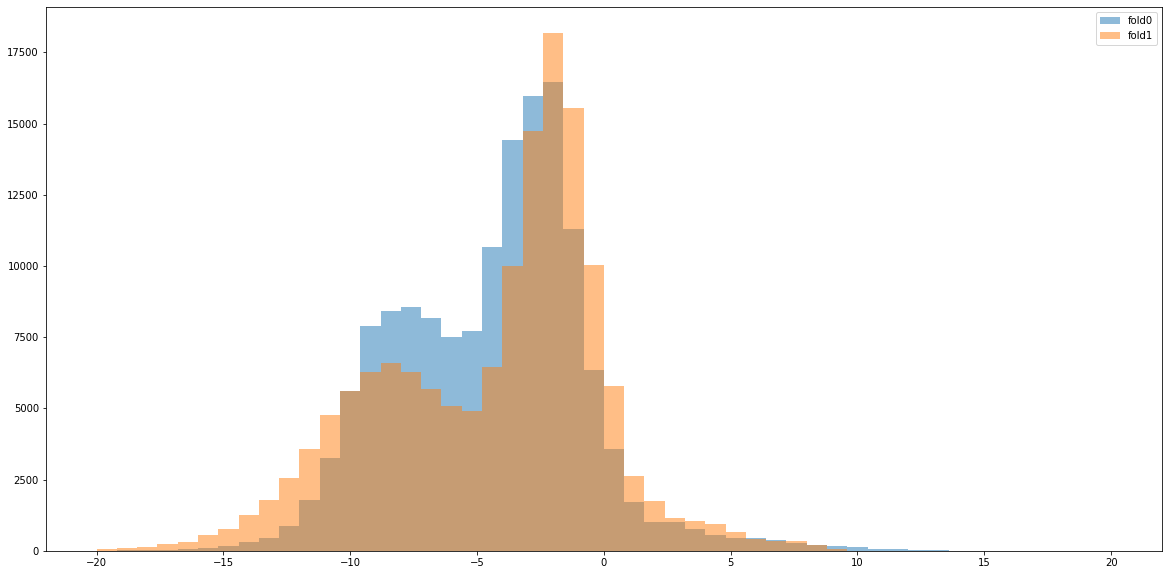

In [66]:
plt.figure(figsize=(20,10))

plt.hist( prob_to_logit( s0.label.values ) ,range=(-20,20), bins=50, alpha=0.5, label="fold0") ; 
plt.hist( prob_to_logit( s1.label.values ) ,range=(-20,20), bins=50, alpha=0.5, label="fold1") ; 

# plt.hist( s0.label.values  , bins=150, alpha=0.5, label="fold0") ; 
# plt.hist( s1.label.values  , bins=150, alpha=0.5, label="fold1") ; 

plt.legend()
plt.show()

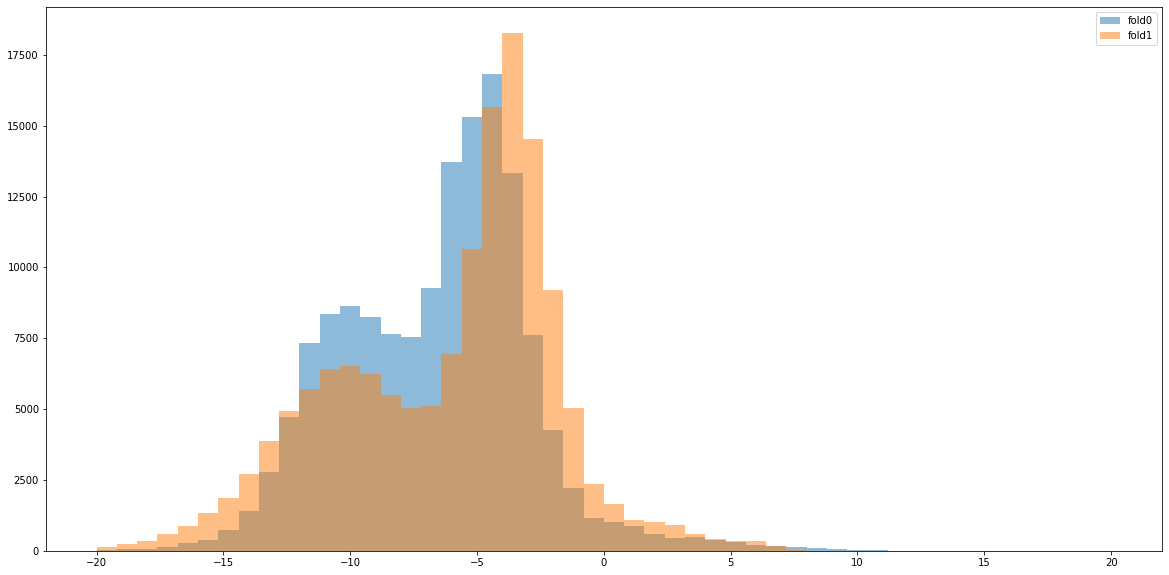

In [67]:
#  before  calib ,Simulated 

plt.figure(figsize=(20,10))

plt.hist( prob_to_logit( s0.label.values ) - np.log(8.55503) ,range=(-20,20), bins=50, alpha=0.5, label="fold0") ; 
plt.hist( prob_to_logit( s1.label.values ) - np.log(5.72045) ,range=(-20,20), bins=50, alpha=0.5, label="fold1") ; 

# plt.hist( logit_to_prob( prob_to_logit( s0.label.values ) - np.log(8.55503) ) , bins=150, alpha=0.5, label="fold0") ; 
# plt.hist( logit_to_prob( prob_to_logit( s1.label.values ) - np.log(5.72045) ) , bins=150, alpha=0.5, label="fold1") ; 

plt.legend()
plt.show()

In [69]:
""" Dist for each validation fold by each fold model"""

def get_pred(_path):
    res = load_pickle(_path)
    raw_pred = pd.DataFrame({
        "sop": res["ids"],
        "pe_present_on_image": res["outputs"]["pe_present_on_image"]  # 010 or later
    })
    return raw_pred.set_index("sop")

raw_pred_035ep1       = get_pred("output/035_pe_present___448/valid.fold0-ep1.picle")
raw_pred_fold1_035ep1 = get_pred("output/035_pe_present___448___apex___resume/valid.fold1-ep1.pickle")
raw_pred_fold1_035ep2 = get_pred("output/035_pe_present___448___apex___resume/valid.fold1-ep2.pickle")

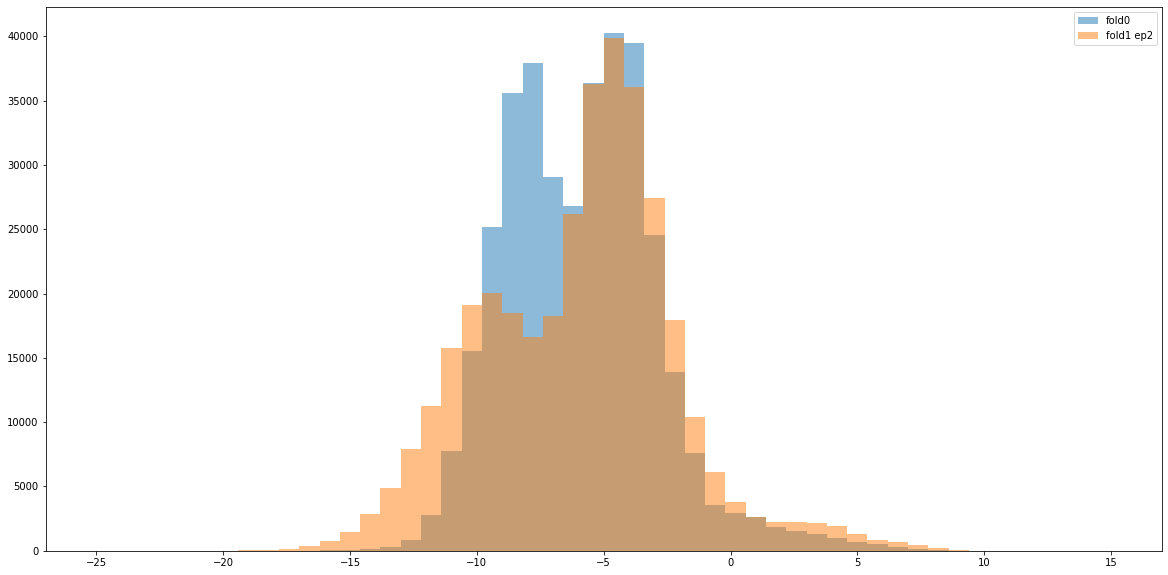

In [71]:
plt.figure(figsize=(20,10))
plt.hist( prob_to_logit( raw_pred_035ep1      .pe_present_on_image.values )  ,range=(-25,15), bins=50, alpha=0.5, label="fold0") ; 
# plt.hist( prob_to_logit( raw_pred_fold1_035ep1.pe_present_on_image.values )  ,range=(-25,15), bins=50, alpha=0.5, label="fold1 ep1") ; 
plt.hist( prob_to_logit( raw_pred_fold1_035ep2.pe_present_on_image.values )  ,range=(-25,15), bins=50, alpha=0.5, label="fold1 ep2") ; 

plt.legend()
plt.show()